# Regression (sklearn to tensorflow)

## 1. Data Preparation

In [1]:
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
from sklearn import datasets, linear_model, discriminant_analysis
##
# Issue: cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. 
# This module will be removed in 0.20."This module will be removed in 0.20.", DeprecationWarning)
# Solution: http://www.cnblogs.com/akrusher/articles/6442326.html
##
from sklearn.model_selection import train_test_split

In [2]:
def load_data():
    """
    Load sklearn dataset with diabetes records.
    
    Return
    -----------
    X_train
    X_test
    y_train
    y_test
    """
    diabetes = datasets.load_diabetes()
    # diabetes is dictionary, using diabetes.keys() to see all keys
    return train_test_split(diabetes.data, diabetes.target, test_size=0.25, random_state=0)

In [3]:
def generate_alphas():
    numbers = [(10 ** x) for x in range(-2, 4)]
    alphas = []
    for number in numbers:
        alphas.extend(number * np.array([1.0, 2.0, 5.0]))
    return alphas[:-2]

In [4]:
def display_summary(regr):
    """
    print out summary for result.
    """
    print("Coefficients:%s, intercept: %.2f" % (regr.coef_, regr.intercept_))
    print("Residual sum of squares: %.2f" % (np.mean((regr.predict(X_test) - y_test) ** 2)))
    print("Score: %.2f" % (regr.score(X_test, y_test)))

In [5]:
X_train, X_test, y_train, y_test = load_data()

## 2. Learning via Sklearn

### 2.1 [Sklearn] simple linear regression

In [6]:
def test_LinearRegression(*data):
    """
    Using sklearn to do linear regressin.
    """
    X_train, X_test, y_train, y_test = data
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    display_summary(regr)

In [7]:
test_LinearRegression(X_train, X_test, y_train, y_test)

Coefficients:[ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
  261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354], intercept: 153.07
Residual sum of squares: 3180.20
Score: 0.36


### 2.2 [Sklearn] ridge linear regression

Regularization Term: $\alpha ||\vec{W}||_{2}^{2}$ and analyze how $\alpha$ impact result

In [8]:
def test_Ridge(*data):
    """
    Using sklearn to do ridge regressin.
    """
    X_train, X_test, y_train, y_test = data
    regr = linear_model.Ridge()
    regr.fit(X_train, y_train)
    display_summary(regr)

In [9]:
test_Ridge(X_train, X_test, y_train, y_test)

Coefficients:[  21.19927911  -60.47711393  302.87575204  179.41206395    8.90911449
  -28.8080548  -149.30722541  112.67185758  250.53760873   99.57749017], intercept: 152.45
Residual sum of squares: 3192.33
Score: 0.36


In [10]:
def test_Ridge_alpha(*data):
    X_train, X_test, y_train, y_test = data
    alphas = generate_alphas()
    scores = []
    for i, alpha in enumerate(alphas):
        regr = linear_model.Ridge(alpha=alpha)
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))
    ## draw
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(alphas, scores)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("Ridge")
    # veritical line, refer to https://stackoverflow.com/questions/16930328/vertical-horizontal-lines-in-matplotlib
    ax.axvline(1.0, ymin=0, ymax=1, ls='dashed', color='r')

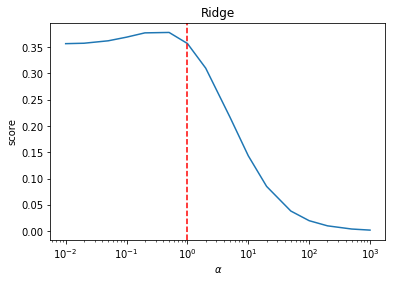

In [11]:
test_Ridge_alpha(X_train, X_test, y_train, y_test)

### 2.3 [Sklearn] Lasso linear regression

Regularization Term: $\alpha ||\vec{W}||_{1}$ and analyze how $\alpha$ impact result

In [12]:
def test_Lasso(*data):
    """
    Using sklearn to do Lasso regressin.
    """
    X_train, X_test, y_train, y_test = data
    regr = linear_model.Lasso()
    regr.fit(X_train, y_train)
    display_summary(regr)

In [13]:
test_Lasso(X_train, X_test, y_train, y_test)

Coefficients:[  0.          -0.         442.67992538   0.           0.
   0.          -0.           0.         330.76014648   0.        ], intercept: 152.52
Residual sum of squares: 3583.42
Score: 0.28


In [14]:
def test_Lasso_alpha(*data):
    X_train, X_test, y_train, y_test = data
    alphas = generate_alphas()
    scores = []
    for i, alpha in enumerate(alphas):
        regr = linear_model.Ridge(alpha=alpha)
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))
    ## draw
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(alphas, scores)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("Lasso")
    # veritical line, refer to https://stackoverflow.com/questions/16930328/vertical-horizontal-lines-in-matplotlib
    ax.axvline(1.0, ymin=0, ymax=1, ls='dashed', color='r')

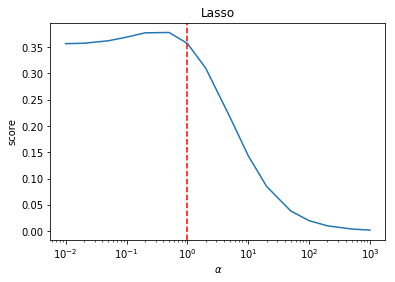

In [15]:
test_Lasso_alpha(X_train, X_test, y_train, y_test)

### 2.4 [Sklearn] ElasticNet linear regression

Regularization Term: $\alpha \rho||\vec{W}||_{1} +  \frac{\alpha (1-\rho)}{2} ||\vec{W}||_{2}^{2} $ and analyze how $\alpha$ and $\rho$ impact result

In [16]:
def test_ElasticNet(*data):
    """
    Using sklearn to do Lasso regressin.
    """
    X_train, X_test, y_train, y_test = data
    regr = linear_model.ElasticNet()
    regr.fit(X_train, y_train)
    display_summary(regr)

In [17]:
test_ElasticNet(X_train, X_test, y_train, y_test)

Coefficients:[ 0.40560736  0.          3.76542456  2.38531508  0.58677945  0.22891647
 -2.15858149  2.33867566  3.49846121  1.98299707], intercept: 151.93
Residual sum of squares: 4922.36
Score: 0.01


In [18]:
def test_ElasticNet_alpha_rho(*data, angle=(45, -30)):
    X_train, X_test, y_train, y_test = data
    alphas = np.logspace(-2, 2)
    rhos = np.linspace(0.01, 1)
    scores = []
    for alpha in alphas:
        for rho in rhos:
            regr = linear_model.ElasticNet(alpha=alpha, l1_ratio=rho)
            regr.fit(X_train, y_train)
            scores.append(regr.score(X_test, y_test))
    ## draw
    alphas, rhos = np.meshgrid(alphas, rhos)
    scores=np.array(scores).reshape(alphas.shape)
    
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    fig = plt.figure()
    ax = Axes3D(fig)
    surf = ax.plot_surface(alphas, rhos, scores, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.view_init(angle[0], angle[1])
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"$\rho$")
    ax.set_zlabel(r"score")
    ax.set_title("ElasticNet")
    # veritical line, refer to https://stackoverflow.com/questions/16930328/vertical-horizontal-lines-in-matplotlib
#     ax.axvline(1.0, ymin=0, ymax=1, ls='dashed', color='r')

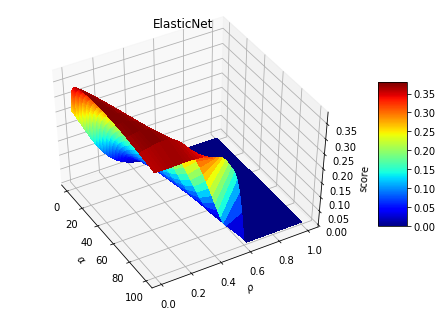

In [19]:
test_ElasticNet_alpha_rho(X_train, X_test, y_train, y_test)

## 3. Learning via Tensorflow

### 3.1 [TF] simple linear regression